In [22]:
import requests

def downloadFile(url):
    response = requests.get(url)
    fname = response.headers['Content-Disposition'].split('=')[1]
    fname = 'data/' + fname
    if response.ok:
        with open(fname, 'wb') as f:
            f.write(response.content)
        return fname

In [312]:
# What is the change in pct of divorced danes from 2008 to 2020?

%pylab inline

url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K1%2C2020K3&CIVILSTAND=F'

# Read the file in pandas
data = pd.read_csv(downloadFile(url), sep = ';')

data['INDHOLD'].astype(float).pct_change()

# 28% stigning fra 2008 - 2020

Populating the interactive namespace from numpy and matplotlib


0         NaN
1    0.284125
Name: INDHOLD, dtype: float64

In [321]:
# Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?

url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=*&CIVILSTAND=TOT%2CU&Tid=2020K3'

# Read
df = pd.read_csv(downloadFile(url), sep = ';')

# Filter Regioner og Hele landet
df = df[df['OMRÅDE'].str.contains('^(?!Region|Hele landet)')]

# Group by OMRÅDE og CIVILSTAND
df = df.groupby(['OMRÅDE', 'CIVILSTAND']).sum().unstack()

# Ny kol
df['pct ugift'] = 0
for index, row in df.iterrows():
    total = row['INDHOLD']['I alt']
    unmarried = row['INDHOLD']['Ugift']
    row['pct ugift'] = (unmarried / total) * 100

# sorter efter byer med flest i alt
df.sort_values([('INDHOLD', 'I alt'), 'pct ugift'], ascending=False, inplace=True)
df.head(5)

#København med 65% - sjovt nok..


INDHOLD         pct ugift
CIVILSTAND   I alt   Ugift          
OMRÅDE                              
København   633035  414218        65
Aarhus      349433  208470        59
Aalborg     217316  118694        54
Odense      204718  112672        55
Vejle       116468   55161        47

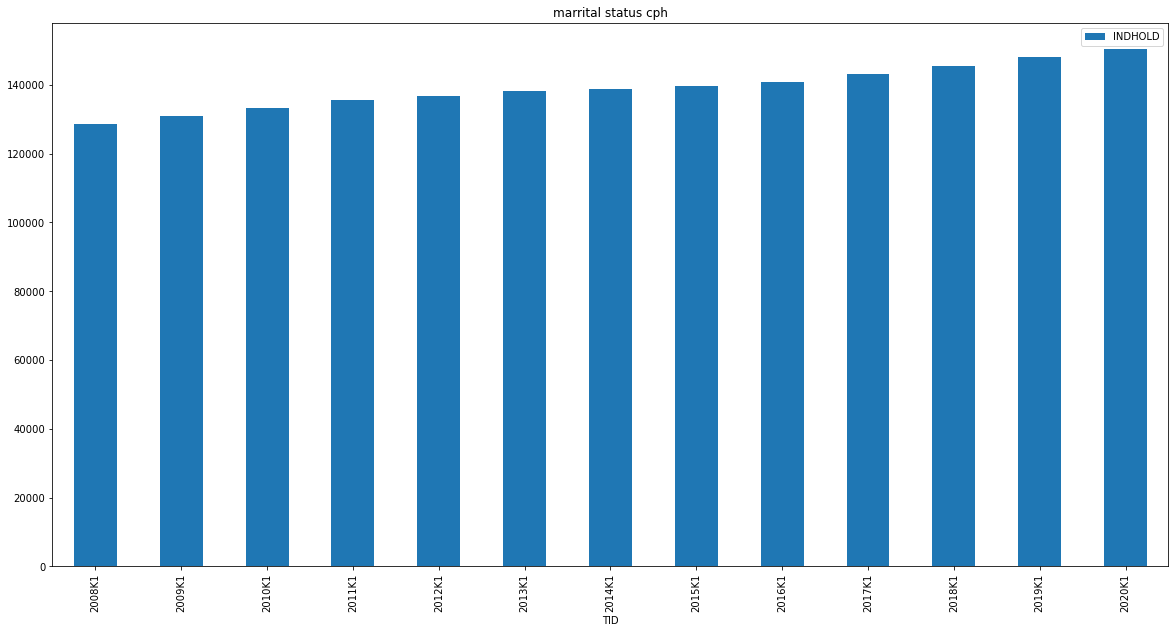

In [354]:
#Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&CIVILSTAND=G&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1'

df = pd.read_csv(downloadFile(url), sep=';')
df.plot(kind="bar", title='marrital status cph', figsize=(20,20), x='TID', y='INDHOLD')

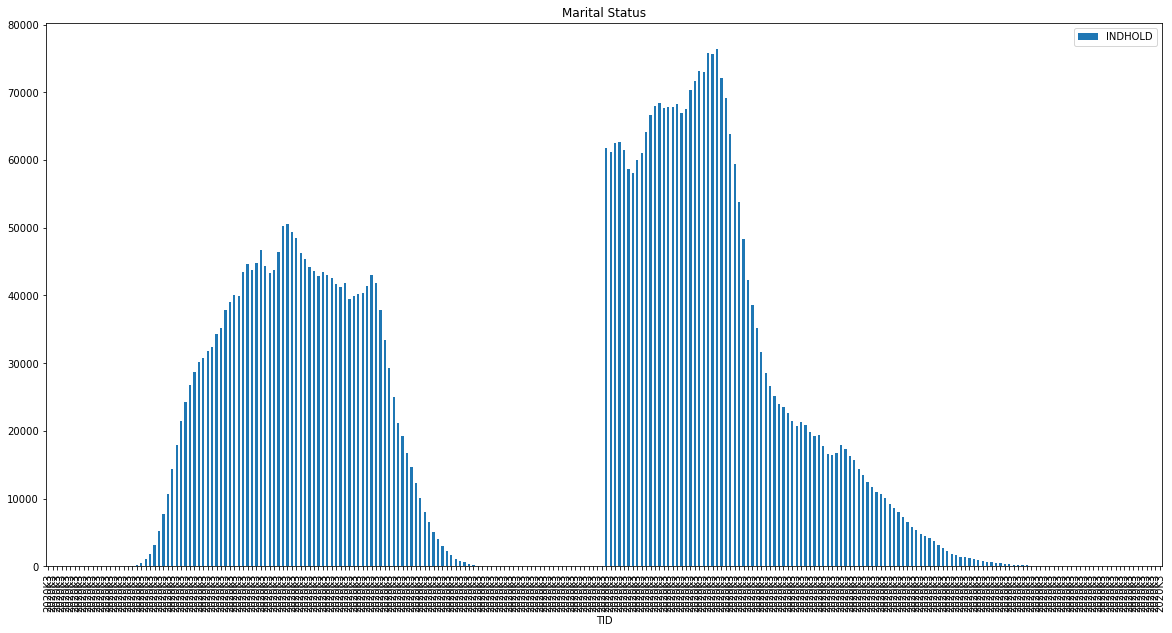

In [353]:
#Show a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)

url ='https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=G%2CU&ALDER=*'

# Read
df = pd.read_csv(downloadFile(url), sep = ';')

df = df[df['ALDER'] != 'I alt']

df.groupby(['ALDER', 'CIVILSTAND']).sum().unstack()

df.plot(kind="bar", title='Marital Status', figsize=(20,10), x='TID', y='INDHOLD')